In [12]:
#pip install vnstock, pandas, ta-lib, mplfinance

In [3]:
from vnstock import Vnstock
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [6]:
stock = Vnstock().stock(symbol='BVS', source='VCI')
df = stock.quote.history(start='2020-03-30', end='2025-03-30', interval='1D')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['SMA_50'] = talib.SMA(df['close'], timeperiod=50)
df['SMA_100'] = talib.SMA(df['close'], timeperiod=100)
df.to_csv("BVS_stock_data_with_indicators.csv")
df.tail()

,open,high,low,close,volume,SMA_50,SMA_100
time,,,,,,,
2025-03-24,41.4,41.4,39.7,40.9,826900,36.854,37.684
2025-03-25,41.6,41.6,39.8,40.3,1279900,36.968,37.680
2025-03-26,40.3,40.3,38.9,39.2,1178500,37.052,37.664
2025-03-27,39.2,39.4,38.6,38.7,824600,37.136,37.643
2025-03-28,38.7,39.4,38.2,38.6,820200,37.238,37.622





            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



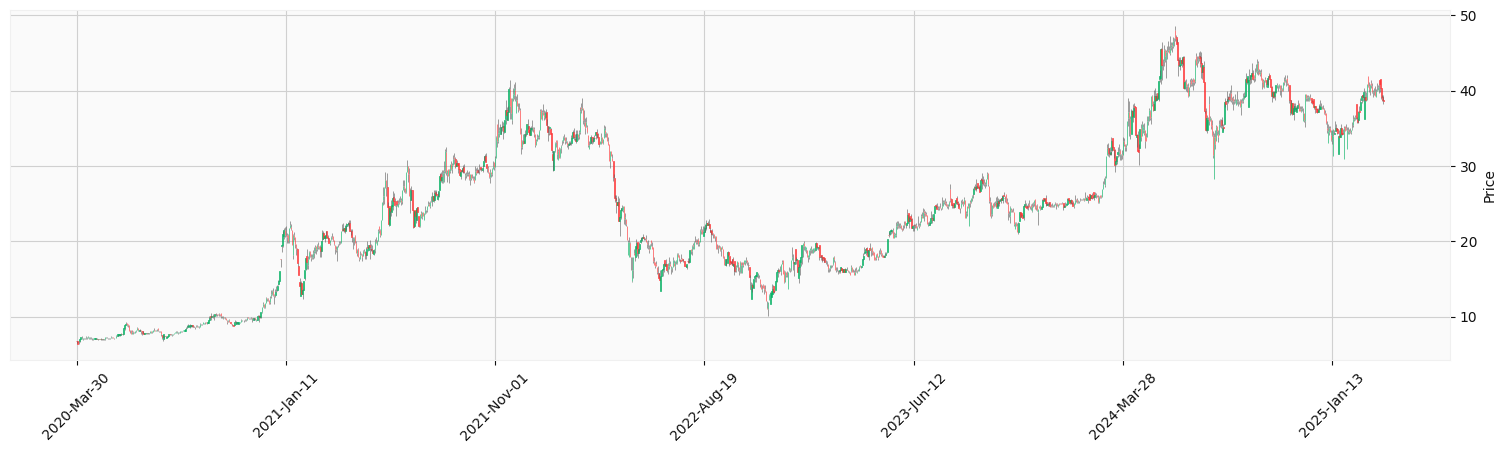

In [ ]:
mpf.plot(df, 
         type='candle', 
         style='yahoo', 
         ylabel='Price', 
         volume=False,
         figsize = (20, 5)
) 

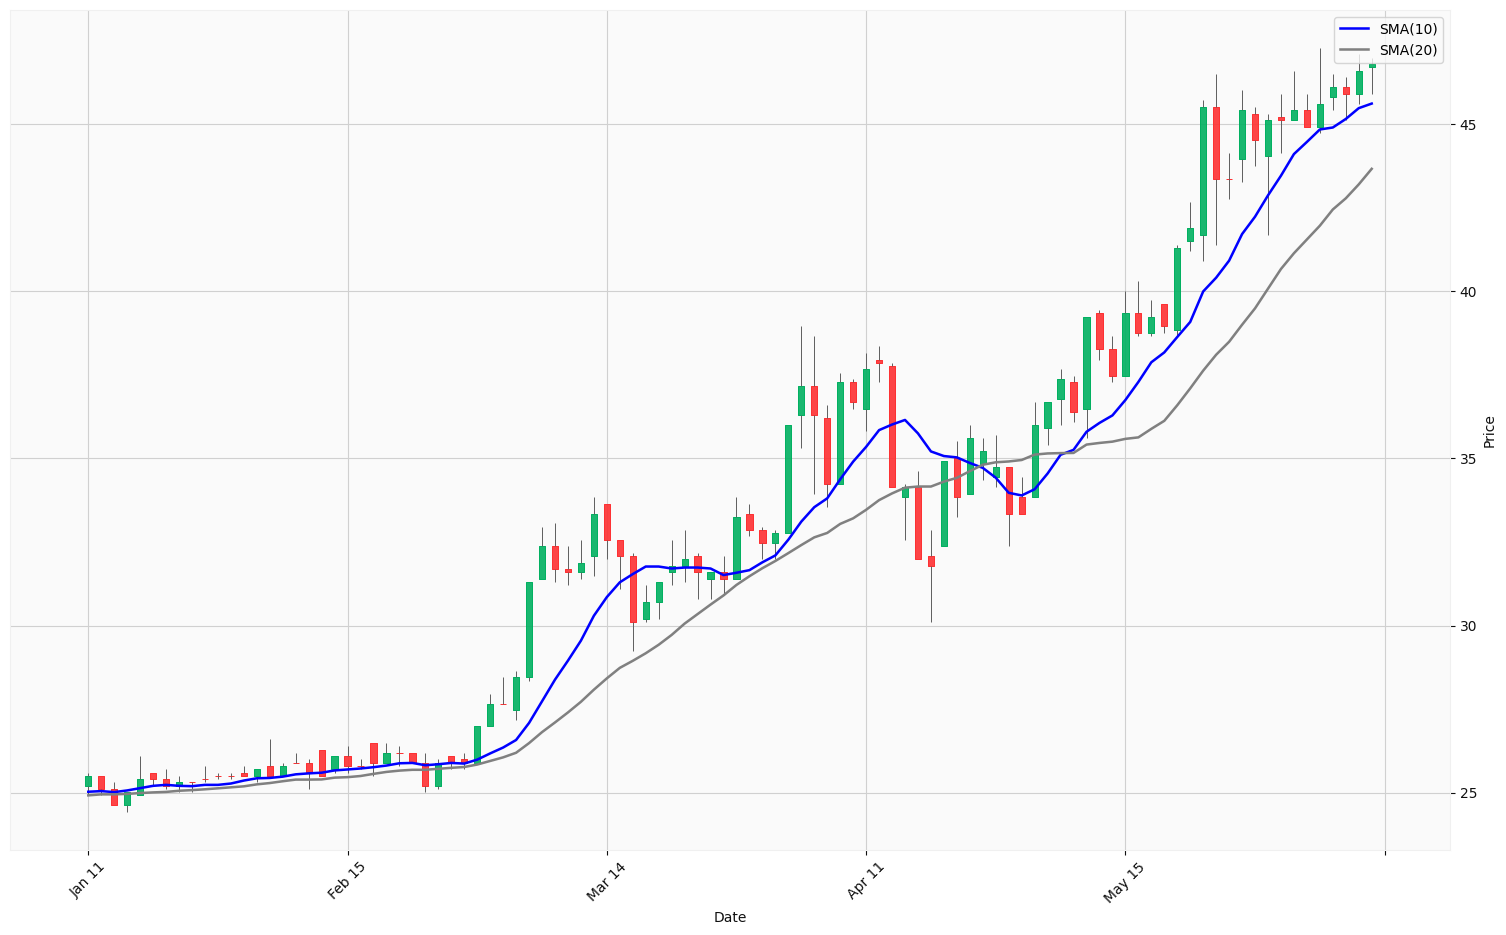

In [16]:
df['SMA_10'] = talib.SMA(df['close'], timeperiod=10)
df['SMA_20'] = talib.SMA(df['close'], timeperiod=20)
addplots = [
    mpf.make_addplot(df['SMA_10'].iloc[950:1050], color='blue', label='SMA(10)'),
    mpf.make_addplot(df['SMA_20'].iloc[950:1050], color='gray', label='SMA(20)'),
]
mpf.plot(df.iloc[950:1050], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         show_nontrading=False
)

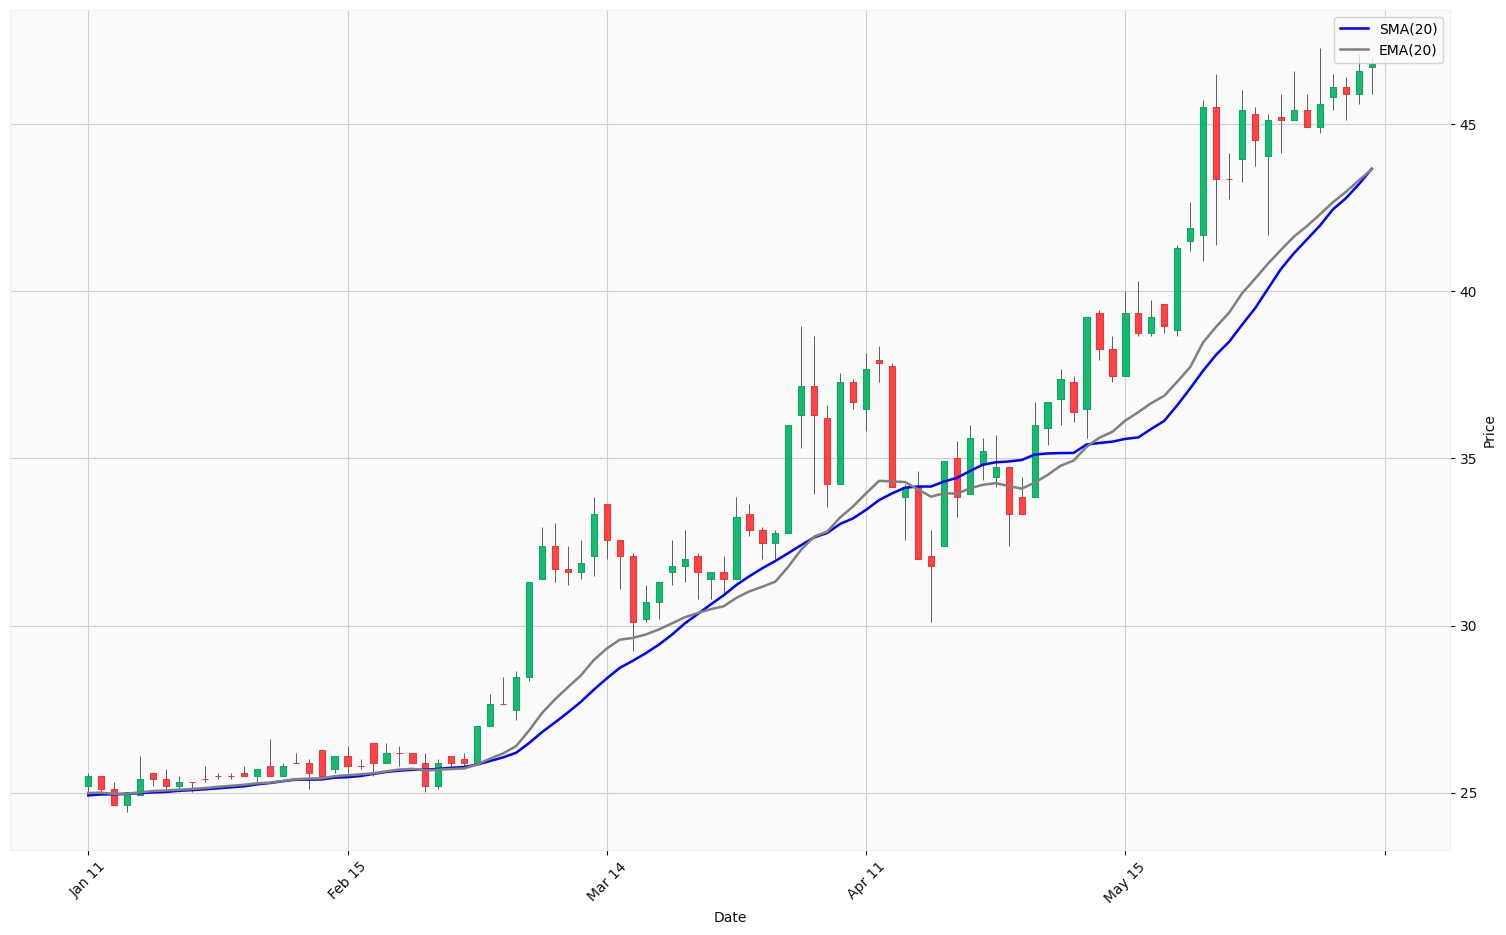

In [17]:

df['EMA_20'] = talib.EMA(df['close'], timeperiod=20)
addplots = [
    mpf.make_addplot(df['SMA_20'].iloc[950:1050], color='blue', label='SMA(20)'),
    mpf.make_addplot(df['EMA_20'].iloc[950:1050], color='gray', label='EMA(20)'),
]
mpf.plot(df.iloc[950:1050], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         show_nontrading=False
)

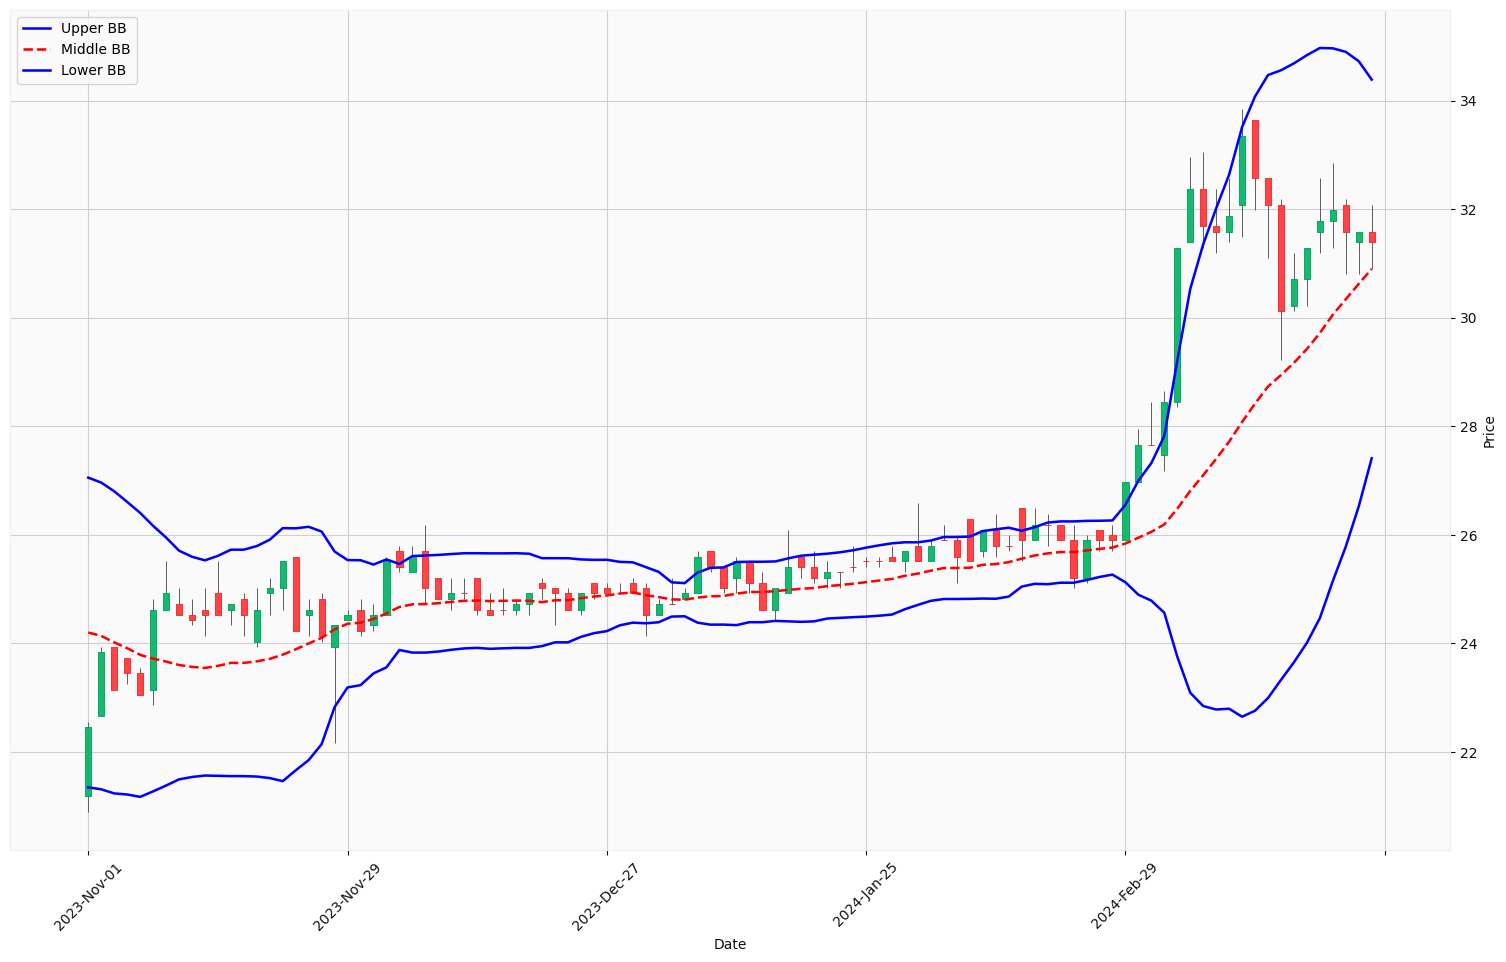

In [23]:
df["Upper_BB"], df["Middle_BB"], df["Lower_BB"] = talib.BBANDS(df["close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
addplots = [

    mpf.make_addplot(df['Upper_BB'].iloc[900:1000], color='blue', linestyle='-', label='Upper BB'),
    mpf.make_addplot(df['Middle_BB'].iloc[900:1000], color='red', linestyle='--', label='Middle BB'),
    mpf.make_addplot(df['Lower_BB'].iloc[900:1000], color='blue', linestyle='-', label='Lower BB'),
]
mpf.plot(df.iloc[900:1000], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         show_nontrading=False
)

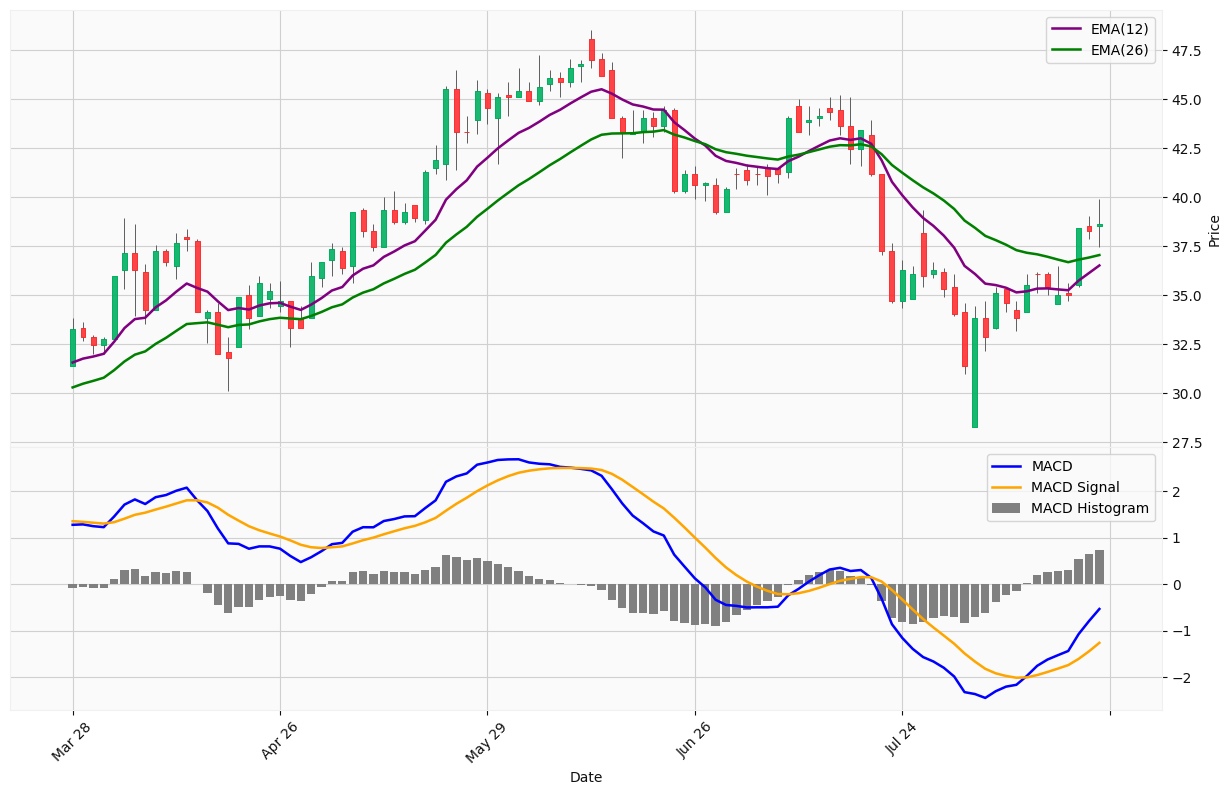

In [19]:
df['EMA_12'] = talib.EMA(df['close'], timeperiod=12)
df['EMA_26'] = talib.EMA(df['close'], timeperiod=26)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
addplots = [
    mpf.make_addplot(df['EMA_12'].iloc[1000:1100], color='purple', label='EMA(12)'),
    mpf.make_addplot(df['EMA_26'].iloc[1000:1100], color='green', label='EMA(26)'),
    mpf.make_addplot(df['MACD'].iloc[1000:1100], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df['MACD_signal'].iloc[1000:1100], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df['MACD_hist'].iloc[1000:1100], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    #mpf.make_addplot([0]*100, color='gray', panel=1, linestyle='--')
]
mpf.plot(df.iloc[1000:1100], 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.6),
         show_nontrading=False
         )

In [20]:
df['Signal'] = 0
df.loc[df.index[50:], 'Signal'] = (df['SMA_50'].iloc[100:] > df['SMA_100'].iloc[100:]).astype(int)
df['Position'] = df['Signal'].diff()
df['Buy_Signal'] = np.where(df['Position'] == 1, df['SMA_50'], np.nan)
df['Sell_Signal'] = np.where(df['Position'] == -1, df['SMA_50'], np.nan)
df_signals= df[pd.notna(df['Buy_Signal']) | pd.notna(df['Sell_Signal'])][['close', 'SMA_50', 'SMA_100', 'Position', 'Buy_Signal', 'Sell_Signal']]
print(df_signals)
#df.to_csv("BVS_stock_data_with_indicators.csv")
#df.tail()

            close   SMA_50  SMA_100  Position  Buy_Signal  Sell_Signal
time                                                                  
2022-03-09  34.99  34.1690  34.2170      -1.0         NaN      34.1690
2022-09-14  19.21  19.1882  19.1452       1.0     19.1882          NaN
2022-11-02  15.77  17.8042  17.8737      -1.0         NaN      17.8042
2023-01-31  19.26  16.7600  16.6561       1.0     16.7600          NaN
2023-04-13  18.22  16.9526  16.9847      -1.0         NaN      16.9526
2023-05-16  20.96  17.8306  17.7845       1.0     17.8306          NaN
2023-11-20  24.62  24.8918  24.8950      -1.0         NaN      24.8918
2024-01-29  25.51  24.9650  24.9475       1.0     24.9650          NaN
2024-08-23  39.14  39.0924  39.2568      -1.0         NaN      39.0924
2024-10-28  40.70  40.3118  40.1455       1.0     40.3118          NaN
2024-12-24  37.40  39.0900  39.1900      -1.0         NaN      39.0900





            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



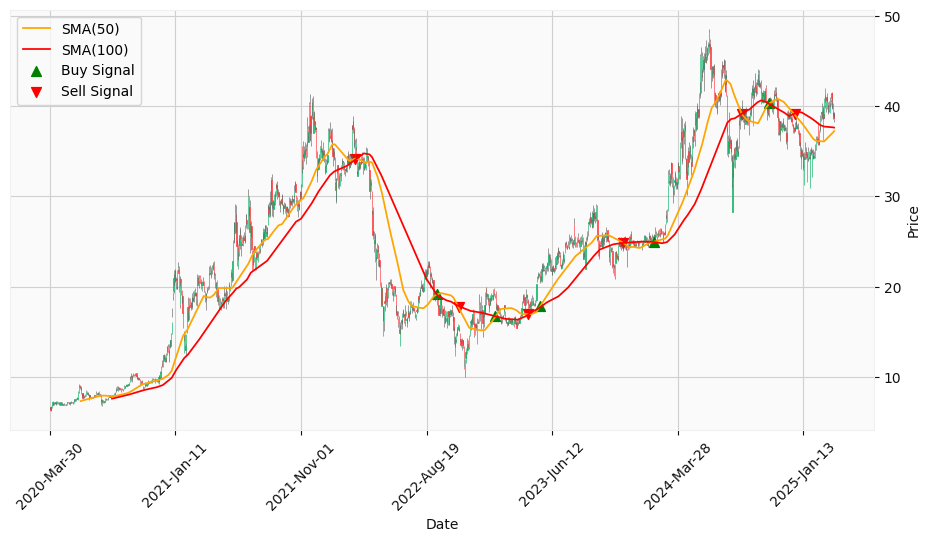

In [21]:
addplots = [
    #mpf.make_addplot(df['close'], label='Close Price', color='blue'),
    mpf.make_addplot(df['SMA_50'], label='SMA(50)', color='orange'),
    mpf.make_addplot(df['SMA_100'], label='SMA(100)', color='red'),
    mpf.make_addplot(df['Buy_Signal'], type='scatter', markersize=50, marker='^', color='green', label='Buy Signal'),
    mpf.make_addplot(df['Sell_Signal'], type='scatter', markersize=50, marker='v', color='red', label='Sell Signal'),
]
mpf.plot(df, 
         type='candle',
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (12, 6),
         show_nontrading=False
         )

In [22]:
trades = []
buy_price = None
buy_date = None
for index, row in df_signals.iterrows():
    if row['Position']==1.0:
        buy_price = row['close']
        buy_date = index
    elif  row['Position'] ==-1.0 and buy_price is not None:
        sell_price = row['close']
        sell_date = index
        profit = sell_price - buy_price
        trades.append({
            'Buy_Date': buy_date,
            'Buy_Price': buy_price,
            'Sell_Date': sell_date,
            'Sell_Price': sell_price,
            'Profit': profit
        })
        buy_price= None
df_trades = pd.DataFrame(trades)
print("Kết quả lãi/lỗ:\n", df_trades)
total_profit = df_trades['Profit'].sum()
print("\nKết quả lãi/lỗ cuối cùng:", total_profit)


Kết quả lãi/lỗ:
     Buy_Date  Buy_Price  Sell_Date  Sell_Price  Profit
0 2022-09-14      19.21 2022-11-02       15.77   -3.44
1 2023-01-31      19.26 2023-04-13       18.22   -1.04
2 2023-05-16      20.96 2023-11-20       24.62    3.66
3 2024-01-29      25.51 2024-08-23       39.14   13.63
4 2024-10-28      40.70 2024-12-24       37.40   -3.30

Kết quả lãi/lỗ cuối cùng: 9.509999999999991
